In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Exploratory data analysis (EDA) on various datasets used.

In [367]:
df = pd.read_csv('CARS_1.csv')
df.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


In [368]:
df.fuel_type.unique()
# different tpyes of cars recorded

array(['Petrol', 'Diesel', 'CNG', 'Electric'], dtype=object)

In [369]:
# calculating average price
df = df.assign(avg_price=lambda x: (x.starting_price + x.ending_price)/2)

In [370]:
df_elec = df.loc[df['fuel_type'] == 'Electric']
# number of electric cars

In [371]:
min_price = df_elec['avg_price'].min()
max_price = df_elec['avg_price'].max()

# the target price range
print("Target Price Range: Rs.", min_price, " - Rs.", max_price)

Target Price Range: Rs. 523000.0  - Rs. 73500000.0


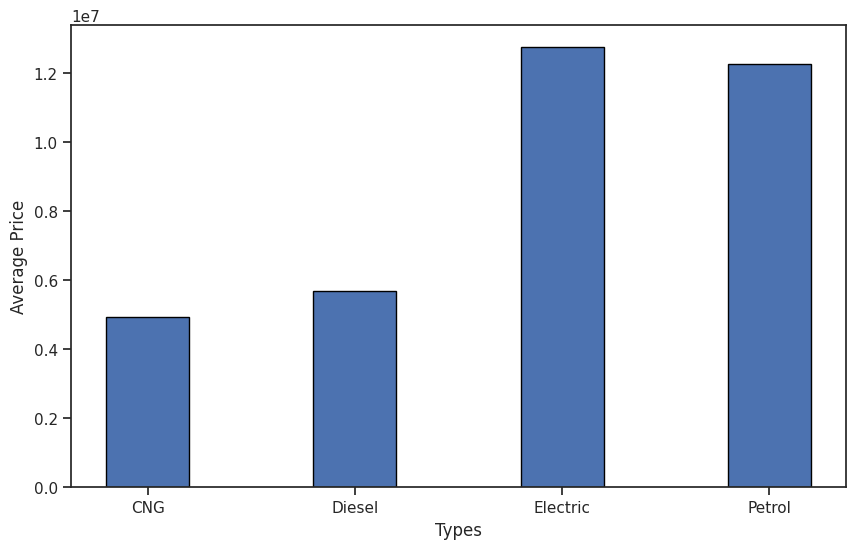

In [372]:
# comparing average price of different fuel types.

grouped_df = df.groupby('fuel_type')['avg_price'].mean()

average_prices = grouped_df.values
types = grouped_df.index

x_pos = np.arange(len(types))

plt.figure(figsize=(10, 6))

bar_width = 0.4

plt.bar(x_pos, average_prices, color='b', width=bar_width, edgecolor='black')

plt.xlabel('Types')
plt.ylabel('Average Price')
plt.xticks(x_pos, types)

plt.show()


The higher average price of electric vehicles suggests that there is a distinct premium segment within the electric vehicle market. This segment consists of consumers who are willing to pay a premium for the advanced technology, environmental benefits, and unique features offered by electric vehicles. These consumers typically have higher purchasing power and prioritize factors such as sustainability, performance, and cutting-edge technology.

The higher price of electric vehicles indicates that the market segment for electric vehicles is likely to include more affluent consumers who can afford the higher upfront cost associated with electric vehicles. This segment may comprise individuals who prioritize luxury, status, and the latest innovations in transportation.

It also suggests that the electric vehicle market segment may attract consumers who are interested in embracing new technologies and adopting sustainable practices. These consumers are likely to value the advanced features, connectivity options, and eco-friendly aspects of electric vehicles.

 While the initial purchase price of electric vehicles may be higher, it's important to consider the long-term cost savings associated with electric vehicle ownership. Electric vehicles typically have lower operational costs, including lower fuel expenses and reduced maintenance requirements. This aspect may further influence the segmentation by attracting consumers who value long-term cost savings and are willing to invest more upfront for future benefits.

The higher average price of electric vehicles can also indicate a smaller, more niche segment within the overall automotive market. This segment may present opportunities for market penetration and expansion as electric vehicle technology improves, costs decrease, and more affordable models become available.



In [373]:
sales_types = pd.read_csv('Sales_Type.csv')
sales_types.TYPE.unique()

array(['E-2 WHEELER', 'E-3 WHEELER PASSENGER', 'E-3 WHEELER CARGO',
       'E-4 WHEELER', 'E-BUS', 'OTHER'], dtype=object)

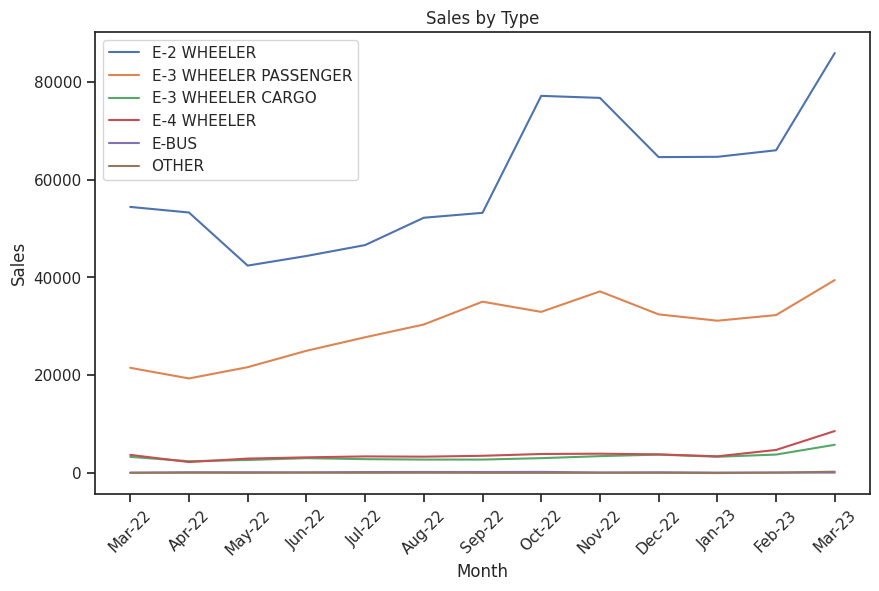

In [374]:
types = sales_types['TYPE']
months = sales_types.columns[1:]

plt.figure(figsize=(10, 6))

for t in types:
    sales = sales_types.loc[sales_types['TYPE'] == t, months].values[0]
    plt.plot(months, sales, label=t)

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Type')

plt.xticks(rotation=45)

plt.legend()

plt.show()

Product Differentiation: The data shows different types of electric vehicles, such as E-2 Wheeler, E-3 Wheeler Passenger, E-3 Wheeler Cargo, E-4 Wheeler, and E-Bus. This indicates that the market is segmented based on the type of vehicle, targeting different customer needs and preferences.

Targeted Customer Groups: Each type of electric vehicle serves a specific purpose or caters to a particular customer segment. For example, E-2 Wheelers might be targeting individual commuters, while E-3 Wheeler Cargo might be focused on businesses involved in transporting goods. The market segmentation is based on the intended customers for each vehicle type.

Varying Demand: The varying sales numbers for each vehicle type across different months suggest that the demand for each segment fluctuates over time. This indicates that customer preferences, seasonal factors, or other market dynamics may influence the sales performance of different vehicle types.

Market Share: By analyzing the relative sales performance of each type, we can gain insights into the market share of each segment. Types with higher sales numbers may indicate a larger market share, while lower sales numbers may suggest a smaller market share.



In [375]:
bike_data = pd.read_csv('2-wheeler-EV-bikewale.csv')
bike_data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [376]:
bike_data.rename(columns = {'Ridden for':'ridden_for'}, inplace = True)

bike_data.ridden_for.unique()

array([nan, '< 5000 kms', '5000-10000 kms', '> 15000 kms',
       '10000-15000 kms', 'Never owned'], dtype=object)

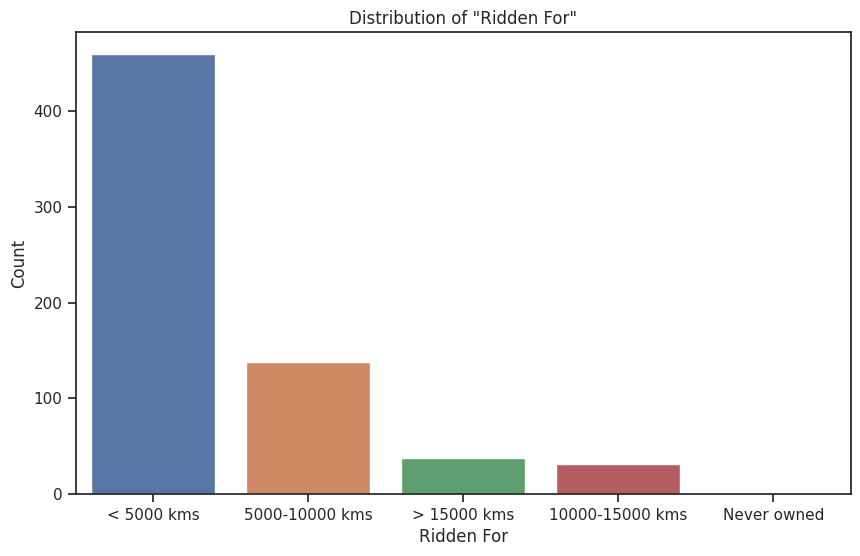

In [377]:
ridden_for = bike_data['ridden_for']

plt.figure(figsize=(10, 6))

sns.countplot(data=bike_data, x='ridden_for')

plt.xlabel('Ridden For')
plt.ylabel('Count')
plt.title('Distribution of "Ridden For"')

plt.show()

In [378]:
data_states = pd.read_csv('EV_India.csv')
data_states.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"


<ipython-input-379-ab28c2fd80af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Electric Vehicle'] = data['Total Non-Electric Vehicle'].str.replace(',', '').astype(int)
<ipython-input-379-ab28c2fd80af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Non-Electric Vehicle'] = data['Total Non-Electric Vehicle'].str.replace(',', '').astype(int)
<ipython-input-379-ab28c2fd80af>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

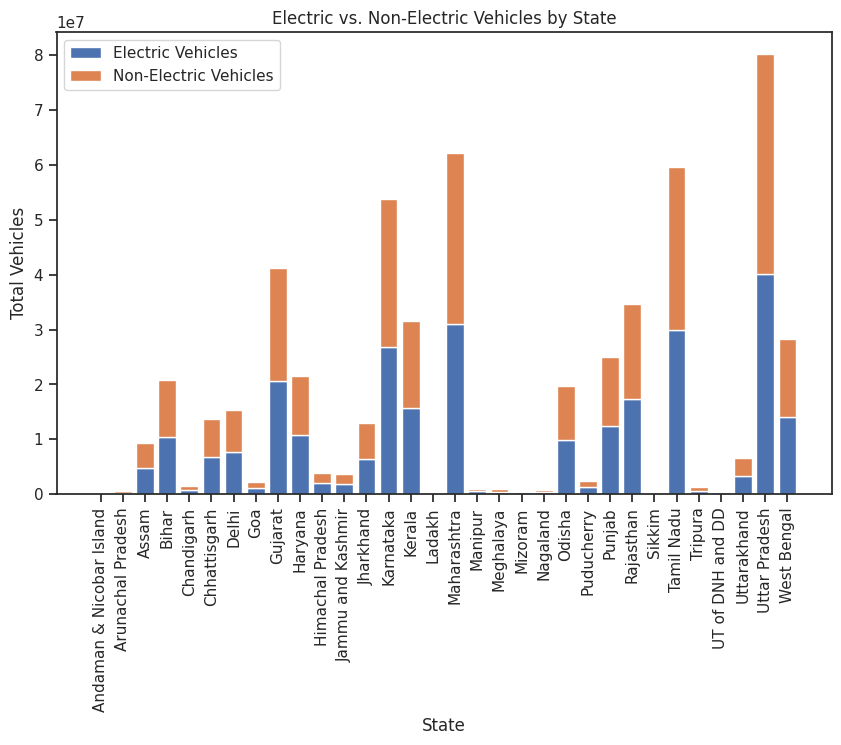

In [379]:
data = data_states.dropna()

data['Total Electric Vehicle'] = data['Total Non-Electric Vehicle'].str.replace(',', '').astype(int)
data['Total Non-Electric Vehicle'] = data['Total Non-Electric Vehicle'].str.replace(',', '').astype(int)

data['Total Electric Vehicle'] = data['Total Electric Vehicle'].astype(int)
data['Total Non-Electric Vehicle'] = data['Total Non-Electric Vehicle'].astype(int)

states = data['State Name']
ev_counts = data['Total Electric Vehicle']
non_ev_counts = data['Total Non-Electric Vehicle']

plt.figure(figsize=(10, 6))

plt.bar(states, ev_counts, label='Electric Vehicles')
plt.bar(states, non_ev_counts, bottom=ev_counts, label='Non-Electric Vehicles')

plt.xlabel('State')
plt.ylabel('Total Vehicles')
plt.title('Electric vs. Non-Electric Vehicles by State')

plt.xticks(rotation=90)

plt.legend()

plt.show()

The plot allows you to compare the total number of electric and non-electric vehicles in different states. You can identify states with a higher proportion of electric vehicles, suggesting a potentially more receptive market for EVs. These states may have supportive policies, charging infrastructure, or higher consumer adoption rates.

The bar plot provides insights into the relative market potential for electric vehicles in different states. States with a larger gap between electric and non-electric vehicle counts may indicate a higher market demand or more favorable market conditions for EVs. These states may present opportunities for targeted marketing, infrastructure investments, or policy interventions to further promote electric vehicle adoption.

By examining the differences in electric and non-electric vehicle counts across states, we can identify segments of the population that show greater interest or adoption of electric vehicles. This segmentation analysis can help inform marketing strategies, product offerings, and policy initiatives tailored to specific regions and consumer preferences.

In [380]:
df = pd.read_csv("/content/Indian automoble buying behavour study 1.0.csv")
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [381]:
df['Wife Working'].unique()
# there is an abmiguous value which must be dealt with. In this case we simply drop the row as it occurs only once.

array(['No', 'Yes', 'm'], dtype=object)

In [382]:
df.loc[df['Wife Working'] == 'm']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


In [383]:
df.drop([11], inplace = True)

In [384]:
df['Wife Working'].unique()

array(['No', 'Yes'], dtype=object)

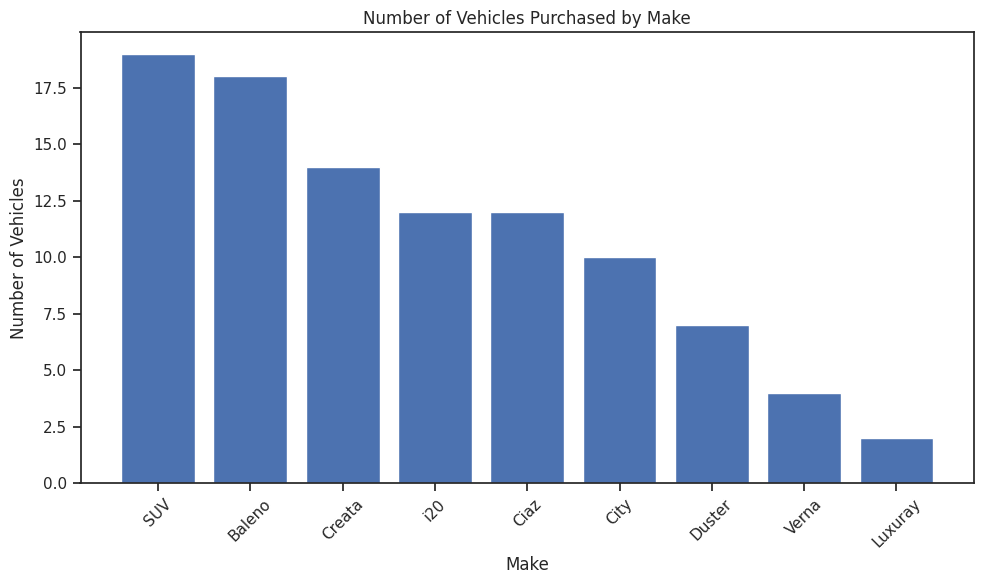

In [385]:
# visualizing the number of purchases with respect to the vhicle 'make'

vehicle_make = df['Make']

make_counts = vehicle_make.value_counts()

plt.figure(figsize=(10, 6))

plt.bar(make_counts.index, make_counts)

plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles Purchased by Make')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

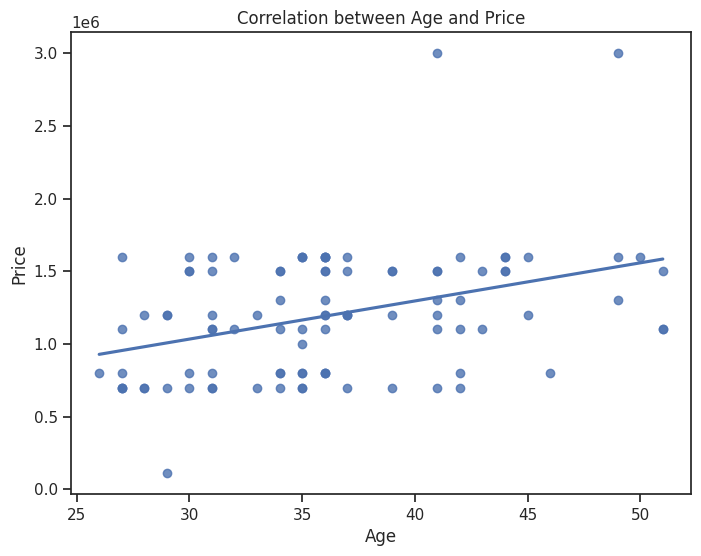

In [386]:
age = df['Age']
price = df['Price']

# Plotting the scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=age, y=price, ci=None)

plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Correlation between Age and Price')

plt.show()


In [387]:
correlation = df['Age'].corr(df['Price'])
print(f"Correlation between Age and Price: {correlation}")

Correlation between Age and Price: 0.37678251687146397


A correlation coefficient of 0.37 indicates a positive correlation between the "Age" and "Price" variables in your dataset. However, it is important to note that the strength of the correlation is considered to be moderate.

In [388]:
df['Profession'].unique()

array(['Salaried', 'Business'], dtype=object)

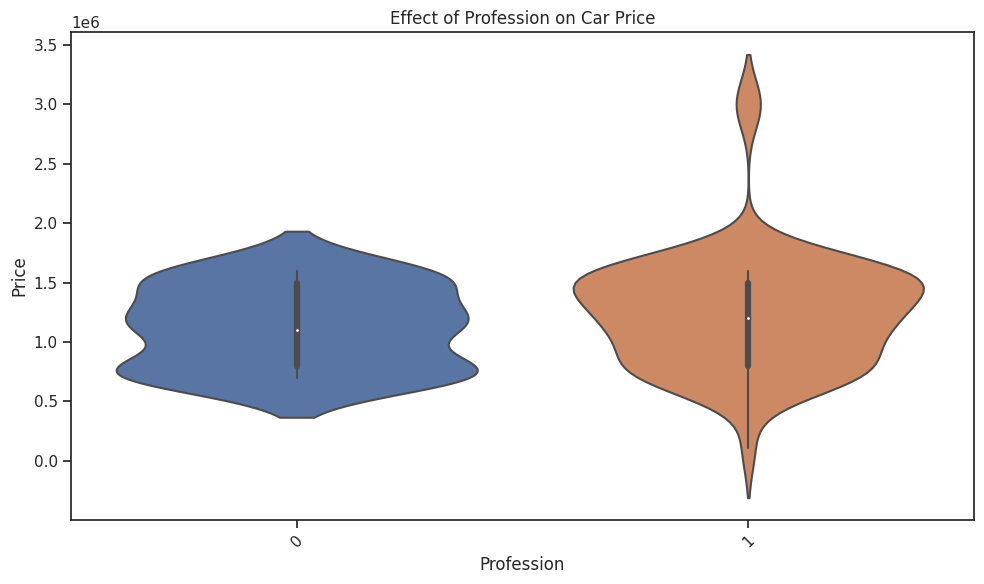

In [409]:
# comparing profession and price of car

profession = df['Profession']
price = df['Price']

plt.figure(figsize=(10, 6))
sns.violinplot(x=profession, y=price)

plt.xlabel('Profession')
plt.ylabel('Price')
plt.title('Effect of Profession on Car Price')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


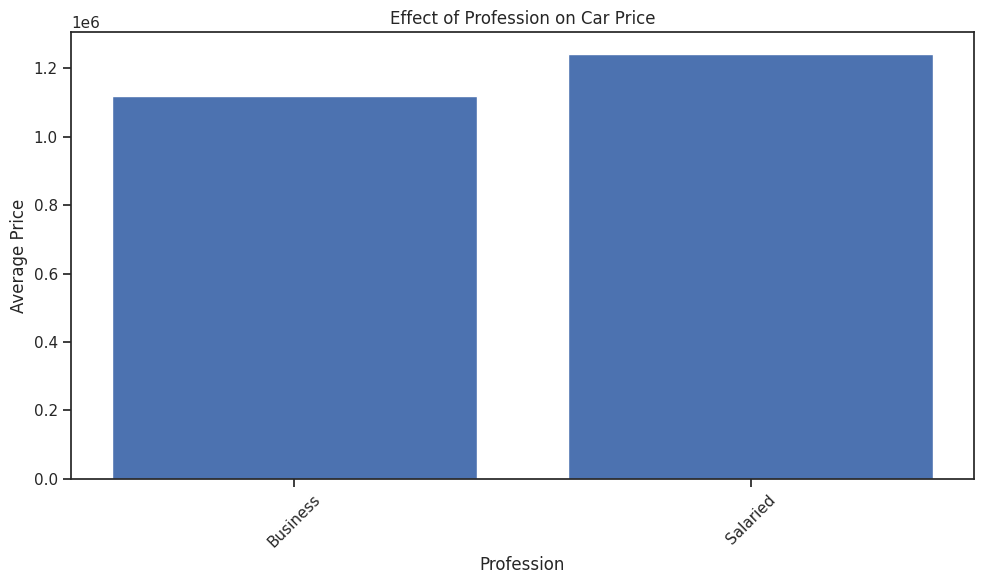

In [390]:
# Calculate the average price per profession
avg_price_by_profession = df.groupby('Profession')['Price'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_profession.index, avg_price_by_profession)

plt.xlabel('Profession')
plt.ylabel('Average Price')
plt.title('Effect of Profession on Car Price')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


On visualizing the relation between profession and price of car, we can understand that there isn't much of a relationship. Businessmen prefer to stick to moderately priced vehicles whereas few salaried professionals invest in higher end models.

<Figure size 1200x600 with 0 Axes>

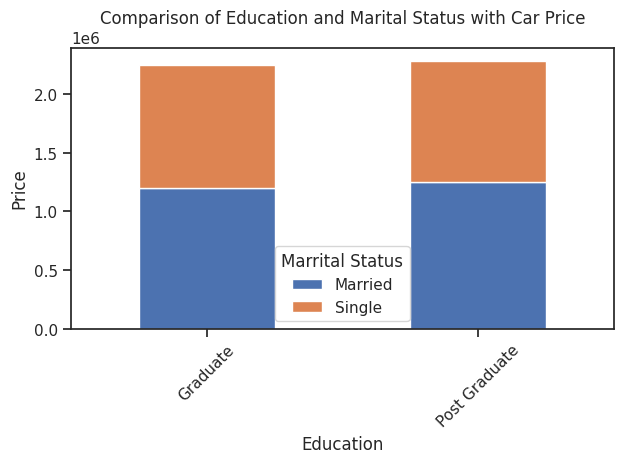

In [391]:
education = df['Education']
marital_status = df['Marrital Status']
price = df['Price']

# Calculate the average price per education and marital status category
avg_price_by_edu_marital = df.groupby(['Education', 'Marrital Status'])['Price'].mean().unstack()

plt.figure(figsize=(12, 6))
avg_price_by_edu_marital.plot(kind='bar', stacked=True)

plt.xlabel('Education')
plt.ylabel('Price')
plt.title('Comparison of Education and Marital Status with Car Price')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

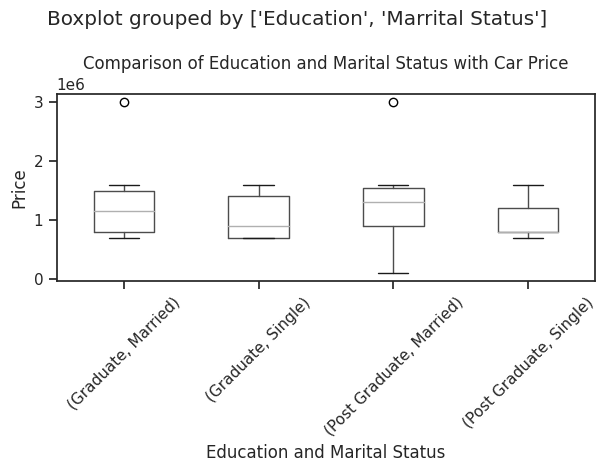

In [392]:
plt.figure(figsize=(12, 6))
df.boxplot(column='Price', by=['Education', 'Marrital Status'], grid=False)

plt.xlabel('Education and Marital Status')
plt.ylabel('Price')
plt.title('Comparison of Education and Marital Status with Car Price')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


There are a few outliers when it comes to married individuals, which tells us couples can be targetted with higher priced models.

In [393]:
df['House Loan'].unique()

array(['No', 'Yes'], dtype=object)

In [394]:
# Convert 'House Loan' column to binary values (0 or 1)
df['House Loan'] = df['House Loan'].map({'No': 0, 'Yes': 1})

In [395]:
df['House Loan'].unique()

array([0, 1])

In [396]:
house_loan = df['House Loan']
price = df['Price']

# Calculate the correlation coefficient
correlation = house_loan.corr(price)

# Print the correlation coefficient
print(f"Correlation between House Loan and Price: {correlation}")

Correlation between House Loan and Price: -0.15903490873408055



A correlation coefficient of -0.16 between the "House Loan" and "Price" variables suggests a weak negative correlation. This means that there is a slight tendency for lower house loan values to be associated with higher car prices, or vice versa. However, the correlation is relatively weak, indicating that the relationship between these variables is not strong.

MODEL - K Means Clustering

In [397]:
df = df.drop(['Make'], axis=1)
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,0,No,800000,0,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,1,Yes,1400000,600000,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1,No,1800000,0,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,0,Yes,1600000,600000,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,0,Yes,1800000,800000,2600000,1600000


In [398]:
df['Personal loan'] = df['Personal loan'].map({'No': 0, 'Yes': 1})
df['Wife Working'] = df['Wife Working'].map({'No': 0, 'Yes': 1})
df['Profession'] = df['Profession'].map({'Business': 0, 'Salaried': 1})
df['Education'] = df['Education'].map({'Post Graduate': 0, 'Graduate': 1})
df['Marrital Status'] = df['Marrital Status'].map({'Single': 0, 'Married': 1})


In [399]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,1,0,0,0,1,0,0,800000,0,800000,800000
1,35,1,1,0,2,1,1,1,1400000,600000,2000000,1000000
2,45,0,1,1,4,1,1,0,1800000,0,1800000,1200000
3,41,0,1,0,3,0,0,1,1600000,600000,2200000,1200000
4,31,1,1,0,2,1,0,1,1800000,800000,2600000,1600000


In [400]:
X_scaled = StandardScaler().fit_transform(df)
X_scaled = pd.DataFrame(X_scaled,columns=['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                                          'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
                                          'Total Salary','Price'])
x = X_scaled.to_numpy()
X_scaled

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,-1.493528,0.745356,-2.352304,-0.866025,-1.635810,1.470133,-0.762001,-1.063219,-1.396935,-0.895170,-1.413102,-0.917826
1,-0.212427,0.745356,0.425115,-0.866025,-0.123457,1.470133,1.312335,0.940540,-0.505081,0.099839,-0.267028,-0.457857
2,1.388948,-1.341641,0.425115,1.154701,1.388896,1.470133,1.312335,-1.063219,0.089489,-0.895170,-0.458040,0.002112
3,0.748398,-1.341641,0.425115,-0.866025,0.632719,-0.680211,-0.762001,0.940540,-0.207796,0.099839,-0.076015,0.002112
4,-0.852978,0.745356,0.425115,-0.866025,-0.123457,1.470133,-0.762001,0.940540,0.089489,0.431509,0.306010,0.922050
...,...,...,...,...,...,...,...,...,...,...,...,...
93,-1.493528,-1.341641,-2.352304,1.154701,-1.635810,-0.680211,-0.762001,-1.063219,0.981343,-0.895170,0.114997,0.922050
94,2.189636,0.745356,0.425115,-0.866025,0.632719,-0.680211,-0.762001,0.940540,3.062337,1.260684,2.693665,0.922050
95,2.349774,-1.341641,0.425115,1.154701,-0.123457,1.470133,1.312335,-1.063219,0.684058,-0.895170,-0.076015,-0.227872
96,2.349774,0.745356,0.425115,-0.866025,-0.123457,-0.680211,-0.762001,0.940540,1.427271,1.260684,1.643097,0.692066


In [401]:
WithinClusterSumSquares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(X_scaled)
    WithinClusterSumSquares.append(kmeans.inertia_)


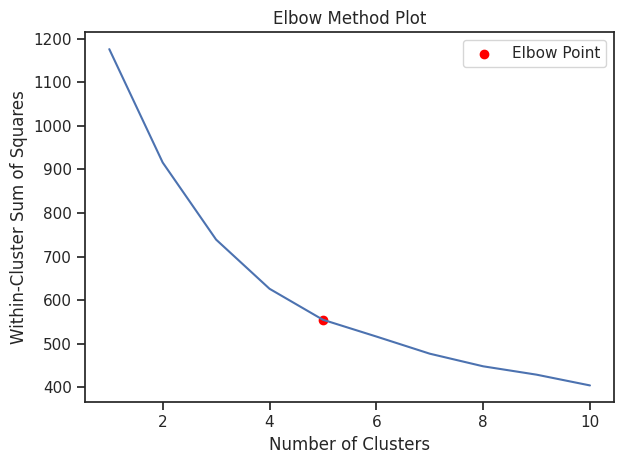

In [402]:
plt.plot(range(1, 11), WithinClusterSumSquares)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.tight_layout()

# Mark the elbow point
plt.scatter(x=5, y=WithinClusterSumSquares[5-1], color='red', marker='o', label='Elbow Point')
plt.legend()

plt.show()

In [403]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',
                    max_iter = 500, n_init = 10,random_state = 5)
kmeans.fit(X_scaled)

KMeans(max_iter=500, n_clusters=5, n_init=10, random_state=5)

In [404]:
y = kmeans.predict(X_scaled)
y_df = pd.DataFrame(y,columns=['Class'])

In [405]:

final_data = pd.concat([df,y_df],axis=1)
final_data

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Class
0,27.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,800000.0,0.0,800000.0,800000.0,4.0
1,35.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1400000.0,600000.0,2000000.0,1000000.0,2.0
2,45.0,0.0,1.0,1.0,4.0,1.0,1.0,0.0,1800000.0,0.0,1800000.0,1200000.0,2.0
3,41.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,1600000.0,600000.0,2200000.0,1200000.0,3.0
4,31.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1800000.0,800000.0,2600000.0,1600000.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,50.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,3800000.0,1300000.0,5100000.0,1600000.0,2.0
96,51.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,2200000.0,0.0,2200000.0,1100000.0,0.0
97,51.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,2700000.0,1300000.0,4000000.0,1500000.0,2.0
98,51.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,2200000.0,0.0,2200000.0,1100000.0,NaN


Scatter Plot with Clusters: After determining the optimal number of clusters, the code performs K-means clustering with 5 clusters. It assigns each data point to one of the clusters and stores the cluster labels in the y array. The scatter plot is then generated, where each point represents a data instance with its coordinates on the x-axis (Age) and y-axis (Price). The points are color-coded based on their assigned cluster label, allowing visualization of the clustering results.

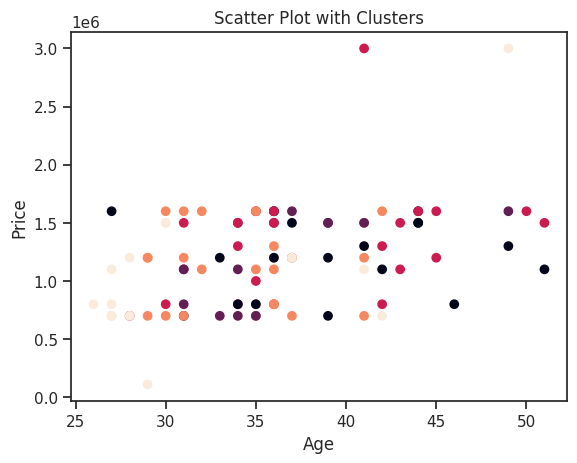

In [410]:
plt.scatter(final_data['Age'], final_data['Price'], c=final_data['Class'])
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Scatter Plot with Clusters')
plt.show()

Box Plot by Cluster: This plot visualizes the distribution of the Price variable across different clusters. The x-axis represents the cluster labels, and the y-axis represents the Price. The box plot shows the median, quartiles, and any outliers in each cluster, allowing for a comparison of the Price distribution among clusters.



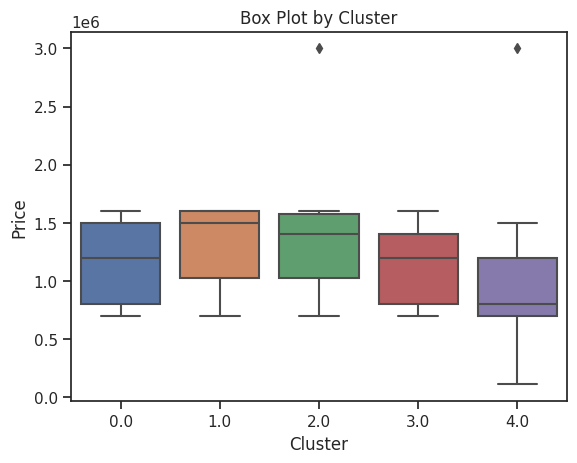

In [407]:
sns.boxplot(x=final_data['Class'], y=final_data['Price'])
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.title('Box Plot by Cluster')
plt.show()

Pair Plot with Clusters: The code uses the sns.pairplot function from the seaborn library to create a matrix of scatter plots for the variables Age, Salary, Wife Salary, Total Salary, and Price. Each scatter plot represents the relationship between two variables, with points color-coded by their cluster label. This plot provides a visual overview of the relationships between variables and how they differ among the clusters.

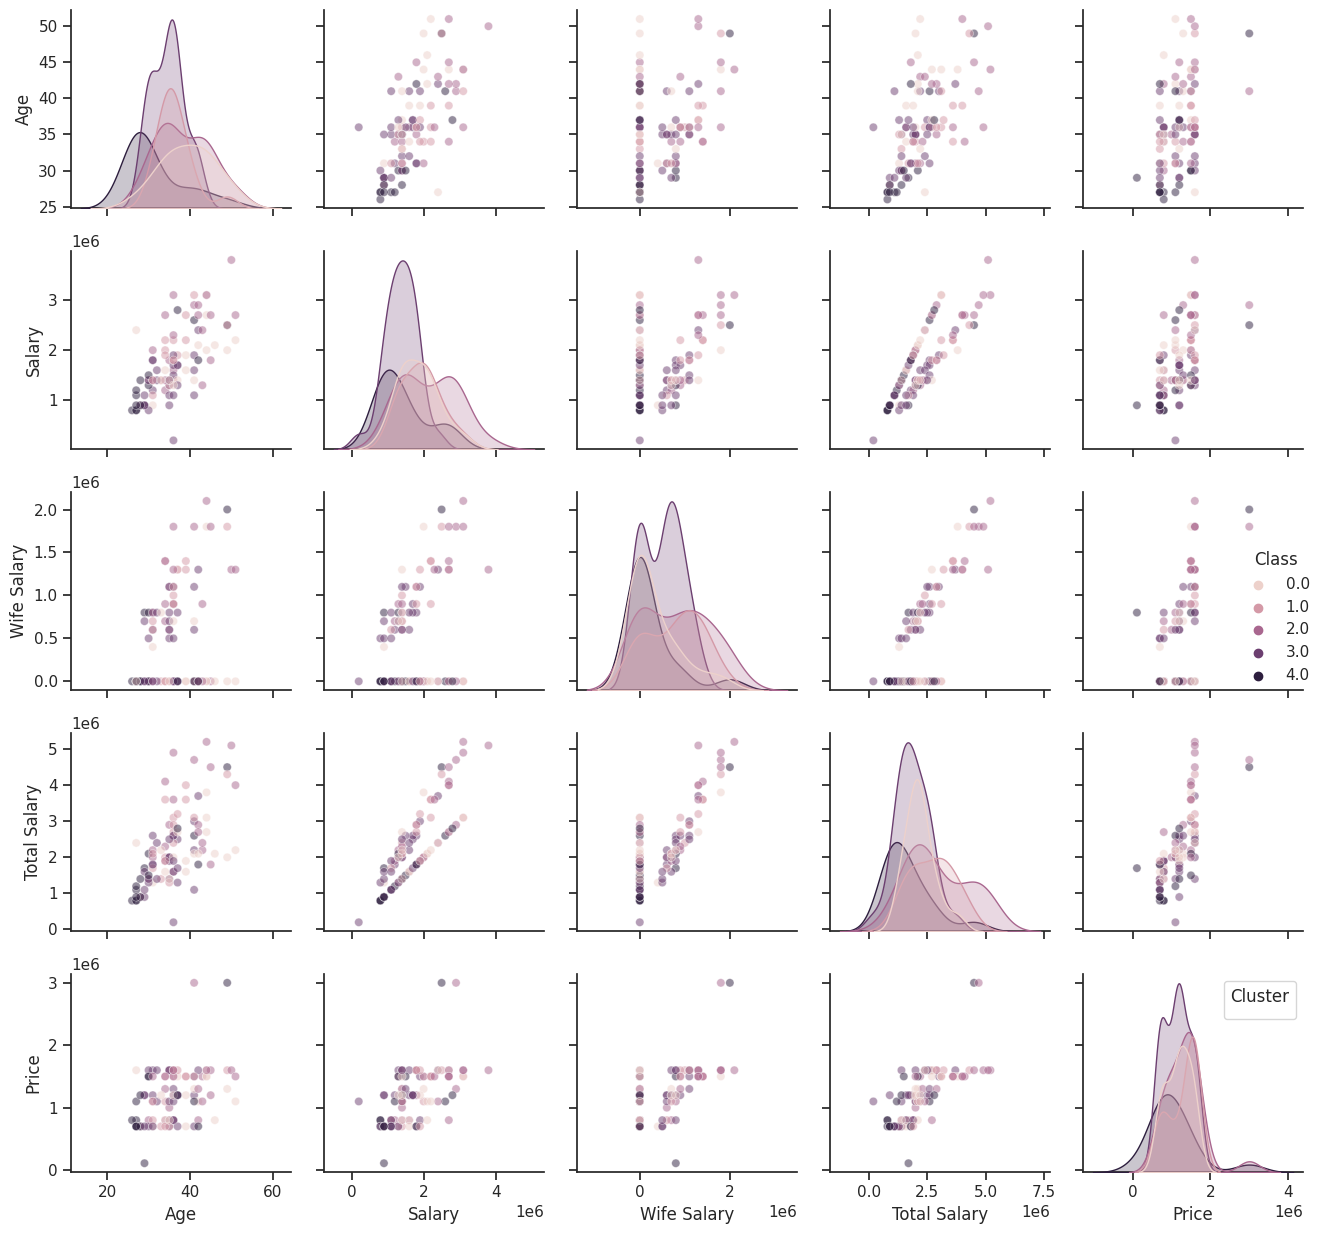

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt
variables = ['Age', 'Salary', 'Wife Salary', 'Total Salary', 'Price']

sns.set(style='ticks')
sns.pairplot(final_data, vars=variables, hue='Class', plot_kws={'alpha': 0.5})

plt.legend(title='Cluster')
plt.tight_layout()

plt.show()